<a href="https://colab.research.google.com/github/EnriqueRangel/AluraStoreLatamChallenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [72]:
#Se importan librerias y recursos
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [73]:
#Se hace comprobación de la factura total de una tienda
factura_total = tienda['Precio'].sum()
print(factura_total)

1150880400.0


In [74]:
#se crea ciclo for para agilizar las facturas totales de cada tienda
# Colocar tiendas en una lista
tiendas = [tienda, tienda2, tienda3, tienda4]

# Usar un for para calcular las facturas
for i, tienda in enumerate(tiendas, start=1):
    factura_total = tienda['Precio'].sum()
    print(f"Tienda {i}: Factura total = {factura_total}")

Tienda 1: Factura total = 1150880400.0
Tienda 2: Factura total = 1116343500.0
Tienda 3: Factura total = 1098019600.0
Tienda 4: Factura total = 1038375700.0


In [75]:
#preparamos el terreno para graficar
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas_totales = [tienda['Precio'].sum() for tienda in tiendas]

In [76]:
# se destaca la tienda con mayor facturación
explode = [0.1 if total == max(facturas_totales) else 0 for total in facturas_totales]

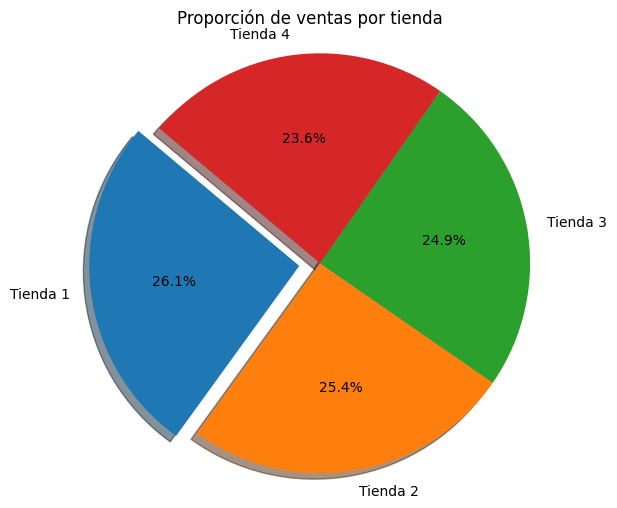

In [77]:
#Se crea el gráfico
plt.figure(figsize=(6, 6))
plt.pie(facturas_totales,
        labels=nombres_tiendas,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        shadow=True)

plt.title('Proporción de ventas por tienda')
plt.axis('equal')  # Mantiene forma circular
plt.show()

###  *No solo nos interesa saber que tienda tiene el mayor porcentaje en ventas si no la cantidad de ella.*
*Se crea función que nos ayude a visualizar ambas*



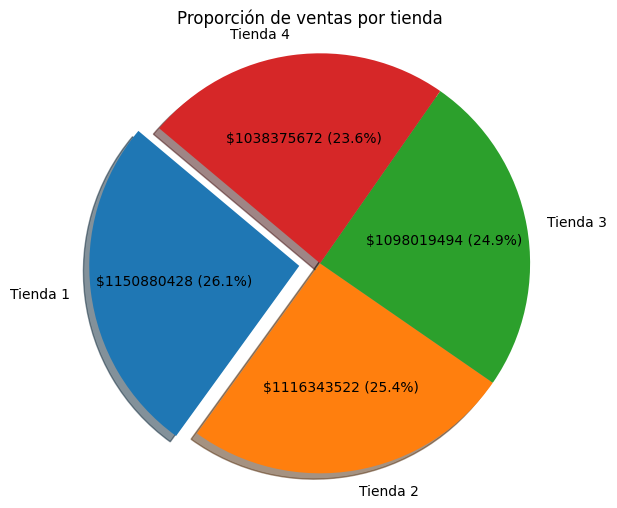

In [78]:
# 👉 Función para mostrar $ y %
def formato_autopct(pct):
    total = sum(facturas_totales)
    valor = int(round(pct * total / 100.0))
    return f"${valor} ({pct:.1f}%)"

# Gráfica
plt.figure(figsize=(6, 6))
plt.pie(facturas_totales,
        labels=nombres_tiendas,
        autopct=formato_autopct,
        startangle=140,
        explode=explode,
        shadow=True)

plt.title('Proporción de ventas por tienda')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

In [79]:
tienda["Categoría del Producto"].value_counts()

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


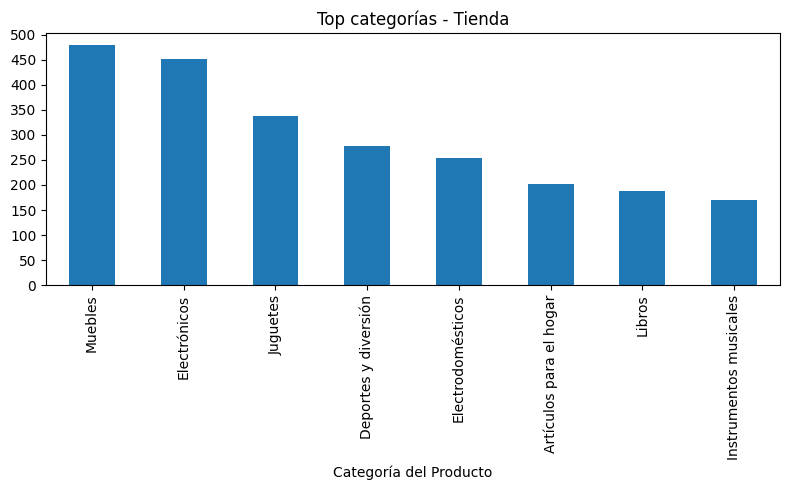

In [80]:
# Conteo de categorías
conteo_1 = tienda["Categoría del Producto"].value_counts()

# Gráfico de barras
ax_1 = conteo_1.plot(kind="bar", title="Top categorías - Tienda", figsize=(8,5))

# Ajustar ticks del eje Y de 50 en 50
ax_1.set_yticks(range(0, int(conteo_1.max()) + 50, 50))

plt.tight_layout()
plt.show()

In [81]:
tienda2["Categoría del Producto"].value_counts()

,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


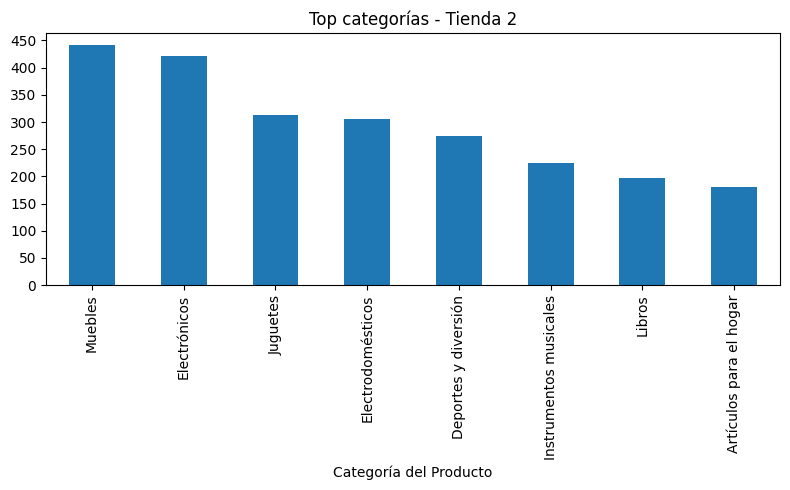

In [82]:
# Conteo de categorías
conteo_2 = tienda2["Categoría del Producto"].value_counts()

# Gráfico de barras
ax_2 = conteo_2.plot(kind="bar", title="Top categorías - Tienda 2", figsize=(8,5))

# Ajustar ticks del eje Y de 50 en 50
ax_2.set_yticks(range(0, int(conteo_2.max()) + 50, 50))

plt.tight_layout()
plt.show()

In [83]:
tienda3["Categoría del Producto"].value_counts()

,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


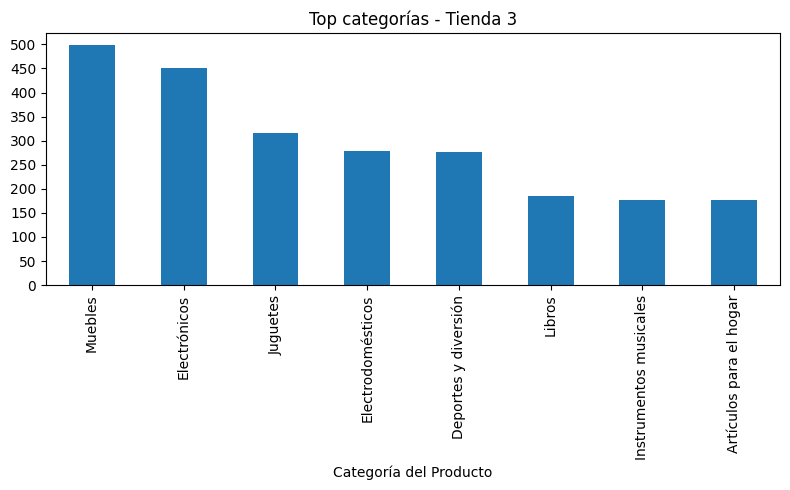

In [84]:
# Conteo de categorías
conteo_3 = tienda3["Categoría del Producto"].value_counts()

# Gráfico de barras
ax_3 = conteo_3.plot(kind="bar", title="Top categorías - Tienda 3", figsize=(8,5))

# Ajustar ticks del eje Y de 50 en 50
ax_3.set_yticks(range(0, int(conteo_3.max()) + 50, 50))

plt.tight_layout()
plt.show()

In [87]:
tienda4["Categoría del Producto"].value_counts()

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


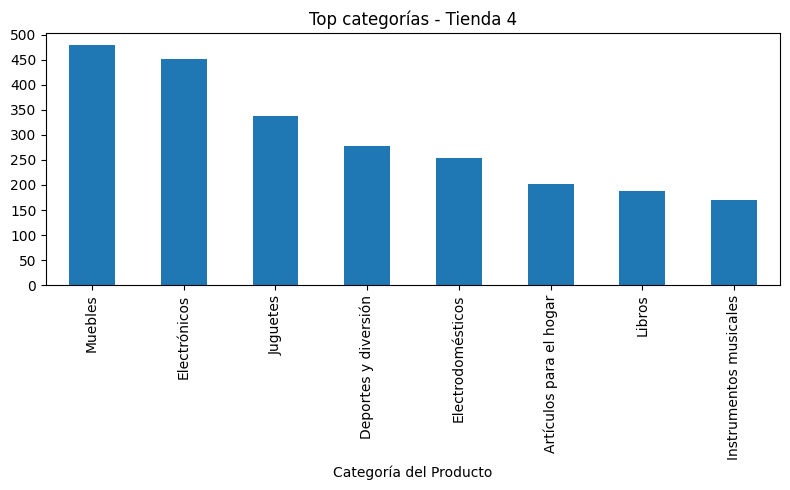

In [88]:
# Conteo de categorías
conteo_4 = tienda4["Categoría del Producto"].value_counts()

# Gráfico de barras
ax_4 = conteo_4.plot(kind="bar", title="Top categorías - Tienda 4", figsize=(8,5))

# Ajustar ticks del eje Y de 50 en 50
ax_4.set_yticks(range(0, int(conteo_4.max()) + 50, 50))

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda